In [2]:

#import cPickle
import os
import numpy as np
import matplotlib.pyplot as plt
import torchvision


In [3]:
cifar10 = torchvision.datasets.CIFAR10('.', download=True)



  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .


In [28]:
labels = np.asarray(cifar10.targets)
data = np.asarray(cifar10.data)
data.shape, labels.shape

((50000, 32, 32, 3), (50000,))

In [ ]:

with open("cifar-10/data_batch_1", 'rb') as fo: # load CIFAR-10 dataset
    dict = cPickle.load(fo)


In [ ]:


labels = np.asarray(dict["labels"]).reshape((10000,1))
data = dict["data"].T



In [29]:
N = labels.shape[0]

labels = np.where(labels==3, 1, 0).T # for cat image, assign 1, non cat image assign 0
data = np.reshape(data, (N, -1))
print(data.shape)
N

(50000, 3072)


50000

In [49]:



train_set_x = data.T[:,:7000]
train_set_y = labels.T[:7000]
test_set_x = data.T[:,7000:]
test_set_y = labels.T[7000:]

#standardize data set
train_set_x = train_set_x/255.
test_set_x = test_set_x/255.

train_set_x.shape, train_set_y.shape

((3072, 7000), (7000,))

In [54]:

def sigmoid(z):

    s = 1/(1+np.exp(-1*z))
    return s


# initialize and zero w and b
def initialize_with_zeros(dim):

    w = np.zeros((dim,1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))

    return w, b

#calculate cost and gradients
def propagate(w, b, X, Y):

    m = X.shape[1]

    #A = sigmoid(X @ w) + b
    A = sigmoid(np.dot(w.T,X)+b)
    cost = np.sum(Y*np.log(A)+((1-Y)*np.log(1-A)))/-m

    dw = np.dot(X,(A-Y).T)/m
    db = (np.sum(A-Y))/m

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost

#iteratea and optize weights and bias
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):

    costs = []

    for i in range(num_iterations):

        grads, cost = propagate(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]

        w -= learning_rate*dw
        b -= learning_rate*db

        if i % 100 == 0:
            costs.append(cost)

        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

#predtic if image is cat or non cat using logistic regression and optimized values for w and b
def predict(w, b, X):

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T,X)+b)

    for i in range(A.shape[1]):


        if A[0,i] < 0.5:
            Y_prediction[0,i]=0
        elif A[0,i]>0.5:
            Y_prediction[0,i]=1
        pass

    assert(Y_prediction.shape == (1, m))

    return Y_prediction

#combine everything to form logistic regression model
def model(X_train, Y_train, X_test, Y_test, num_iterations = 1000, learning_rate = 0.5, print_cost = True):

    w, b = initialize_with_zeros(32*32*3)

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)

    w = parameters["w"]
    b = parameters["b"]

    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d



train accuracy: 89.98571428571428 %
test accuracy: 89.93720930232558 %


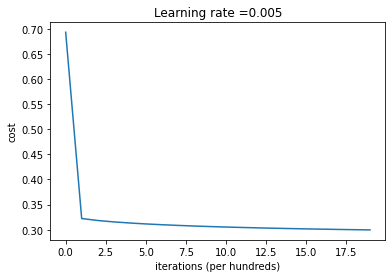

In [55]:


d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

#plot learning curve3072, 1)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()
